In [1]:
import numpy as np
import matplotlib.pyplot as plt

from agent import Agent

Using device:  cuda:0


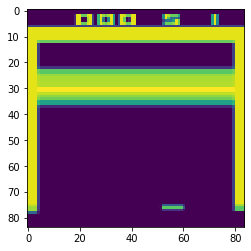

In [2]:
game_name = 'Breakout-v0' # 'VideoPinball-v0'
device = 'cuda:0'

agent = Agent(game_name, device)

plt.imshow(agent.sanity_check_screen())

In [3]:
metrics = agent.train()

Episode  0
Episode  1
Episode  2
Episode  3
Episode  4
Episode  5
Episode  6
Episode  7
Episode  8
Episode  9
Episode  10
Episode  11
Episode  12
Episode  13
Episode  14
Episode  15
Episode  16
Episode  17
Episode  18
Episode  19
Episode  20
Episode  21
Episode  22
Episode  23
Episode  24
Episode  25
Episode  26
Episode  27
Episode  28
Episode  29
Episode  30
Episode  31
Episode  32
Episode  33
Episode  34
Episode  35
Episode  36
Episode  37
Episode  38
Episode  39
Episode  40
Episode  41
Episode  42
Episode  43
Episode  44
Episode  45
Episode  46
Episode  47
Episode  48
Episode  49
Episode  50
Episode  51
Episode  52
Episode  53
Episode  54
Episode  55
Episode  56
Episode  57
Episode  58
Episode  59
Episode  60
Episode  61
Episode  62
Episode  63
Episode  64
Episode  65
Episode  66
Episode  67
Episode  68
Episode  69
Episode  70
Episode  71
Episode  72
Episode  73
Episode  74
Episode  75
Episode  76
Episode  77
Episode  78
Episode  79
Episode  80
Episode  81
Episode  82
Episode  83
Ep

Episode  639
Episode  640
Episode  641
Episode  642
Episode  643
Episode  644
Episode  645
Episode  646
Episode  647
Episode  648
Episode  649
Episode  650
Episode  651
Episode  652
Episode  653
Episode  654
Episode  655
Episode  656
Episode  657
Episode  658
Episode  659
Episode  660
Episode  661
Episode  662
Episode  663
Episode  664
Episode  665
Episode  666
Episode  667
Episode  668
Episode  669
Episode  670
Episode  671
Episode  672
Episode  673
Episode  674
Episode  675
Episode  676
Episode  677
Episode  678
Episode  679
Episode  680
Episode  681
Episode  682
Episode  683
Episode  684
Episode  685
Episode  686
Episode  687
Episode  688
Episode  689
Episode  690
Episode  691
Episode  692
Episode  693
Episode  694
Episode  695
Episode  696
Episode  697
Episode  698
Episode  699
Episode  700
Episode  701
Episode  702
Episode  703
Episode  704
Episode  705
Episode  706
Episode  707
Episode  708
Episode  709
Episode  710
Episode  711
Episode  712
Episode  713
Episode  714
Episode  715

In [4]:
rewards = metrics['rewards']
losses = metrics['losses']
steps = metrics['steps']

assert len(rewards) == len(losses) == len(steps)

episodes_info = list(zip(rewards, losses, steps))
for i, (reward, loss, step) in enumerate(episodes_info):
    print('Episode %d :' % i)
    print('Step - ', step)
    print('Reward - ', reward)
    print('Loss - ', loss)
    print('\n')

Step -  66
Reward -  1.0
Loss -  0.3162648379802704


Step -  109
Reward -  0.0
Loss -  0.26123398542404175


Step -  172
Reward -  1.0
Loss -  0.2530704140663147


Step -  243
Reward -  2.0
Loss -  0.26123398542404175


Step -  336
Reward -  3.0
Loss -  0.26123398542404175


Step -  401
Reward -  1.0
Loss -  0.3162648379802704


Step -  480
Reward -  3.0
Loss -  0.24490685760974884


Step -  549
Reward -  2.0
Loss -  0.26123398542404175


Step -  657
Reward -  3.0
Loss -  0.2530704140663147


Step -  703
Reward -  0.0
Loss -  0.371295690536499


Step -  756
Reward -  0.0
Loss -  0.38762280344963074


Step -  831
Reward -  2.0
Loss -  0.2530704140663147


Step -  922
Reward -  2.0
Loss -  0.26123398542404175


Step -  1025
Reward -  5.0
Loss -  0.26123398542404175


Step -  1129
Reward -  4.0
Loss -  0.3162648379802704


Step -  1201
Reward -  1.0
Loss -  0.26123398542404175


Step -  1254
Reward -  0.0
Loss -  0.26123398542404175


Step -  1319
Reward -  1.0
Loss -  0.3081012666225433

Reward -  0.0
Loss -  0.0


Step -  29162
Reward -  2.0
Loss -  0.0


Step -  29246
Reward -  3.0
Loss -  0.125


Step -  29314
Reward -  1.0
Loss -  0.0


Step -  29368
Reward -  1.0
Loss -  0.03125


Step -  29464
Reward -  4.0
Loss -  0.0625


Step -  29535
Reward -  1.0
Loss -  0.0


Step -  29630
Reward -  3.0
Loss -  0.03125


Step -  29740
Reward -  3.0
Loss -  0.0


Step -  29841
Reward -  3.0
Loss -  0.03125


Step -  29892
Reward -  0.0
Loss -  0.0625


Step -  29955
Reward -  1.0
Loss -  0.0


Step -  30007
Reward -  0.0
Loss -  0.03125


Step -  30118
Reward -  3.0
Loss -  0.125


Step -  30230
Reward -  4.0
Loss -  0.0


Step -  30292
Reward -  1.0
Loss -  0.0


Step -  30361
Reward -  1.0
Loss -  0.0


Step -  30444
Reward -  2.0
Loss -  0.03125


Step -  30564
Reward -  5.0
Loss -  0.0


Step -  30657
Reward -  3.0
Loss -  0.0


Step -  30716
Reward -  1.0
Loss -  0.0


Step -  30788
Reward -  2.0
Loss -  0.03125


Step -  30868
Reward -  3.0
Loss -  0.03125


Step -  30

Loss -  0.03125


Step -  64813
Reward -  1.0
Loss -  0.03125


Step -  64878
Reward -  1.0
Loss -  0.0


Step -  64944
Reward -  1.0
Loss -  0.03125


Step -  64999
Reward -  0.0
Loss -  0.0


Step -  65060
Reward -  1.0
Loss -  0.0


Step -  65110
Reward -  0.0
Loss -  0.03125


Step -  65161
Reward -  0.0
Loss -  0.0625


Step -  65210
Reward -  0.0
Loss -  0.0


Step -  65277
Reward -  1.0
Loss -  0.0


Step -  65357
Reward -  1.0
Loss -  0.0


Step -  65416
Reward -  1.0
Loss -  0.03125


Step -  65471
Reward -  0.0
Loss -  0.0


Step -  65536
Reward -  1.0
Loss -  0.0


Step -  65600
Reward -  1.0
Loss -  0.0


Step -  65693
Reward -  2.0
Loss -  0.0


Step -  65766
Reward -  1.0
Loss -  0.0


Step -  65854
Reward -  1.0
Loss -  0.0


Step -  65958
Reward -  4.0
Loss -  0.0


Step -  66041
Reward -  2.0
Loss -  0.03125


Step -  66087
Reward -  0.0
Loss -  0.03125


Step -  66136
Reward -  0.0
Loss -  0.0625


Step -  66204
Reward -  1.0
Loss -  0.0


Step -  66301
Reward -  3.0


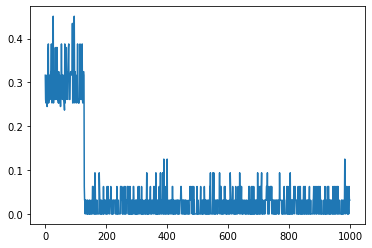

In [5]:
plt.plot(range(len(losses)), losses)
plt.show()

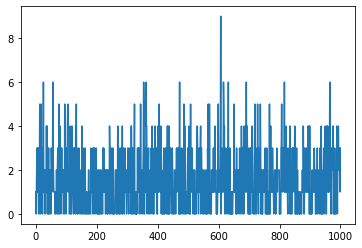

In [6]:
plt.plot(range(len(rewards)), rewards)
plt.show()